In [34]:
import pandas as pd
import numpy as np
import requests as rs
import json as js
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
response=rs.get("https://raw.githubusercontent.com/theand9/data-viz-challenge/master/data.json")
job=js.loads(response.text)

In [36]:
job=js.dumps(job['data'])

In [37]:
df=pd.read_json(job)

In [38]:
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:00:04,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,2014-03-01 00:00:22,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,2014-03-01 00:00:32,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,2014-03-01 00:00:38,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014-03-01 00:00:51,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN


In [39]:
lc=pd.json_normalize(df['location'])
lc

,latitude,city,state,longitude,zip_code
0,40.189788,Lyons,CO,-105.355280,80540
1,33.844371,Alpharetta,GA,-84.474050,30009
2,42.446396,Westford,MA,-71.459405,01886
3,44.624413,Saranac,NY,-73.809266,12981
4,36.747083,Lampe,MO,-93.458626,65681
...,...,...,...,...,...
49995,45.343615,West Linn,OR,-122.664926,97068
49996,41.079983,Greenwich,CT,-73.654472,06831
49997,40.365020,Irwin,PA,-79.584060,15642
49998,39.477625,Martinsville,IN,-86.466792,46151


In [40]:
df=pd.concat([df.drop('location',axis=1), lc], axis=1)
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,amount,latitude,city,state,longitude,zip_code
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:00:04,NaN,40.189788,Lyons,CO,-105.355280,80540
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,2014-03-01 00:00:22,NaN,33.844371,Alpharetta,GA,-84.474050,30009
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,2014-03-01 00:00:32,NaN,42.446396,Westford,MA,-71.459405,01886
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,2014-03-01 00:00:38,NaN,44.624413,Saranac,NY,-73.809266,12981
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014-03-01 00:00:51,NaN,36.747083,Lampe,MO,-93.458626,65681


In [41]:
for x in df:
    print(x,' - ',df[x].value_counts().sum(),end='\n')

category  -  50000
event_name  -  50000
gender  -  50000
age  -  50000
marital_status  -  50000
session_id  -  50000
device  -  50000
client_time  -  50000
amount  -  20658
latitude  -  50000
city  -  50000
state  -  50000
longitude  -  50000
zip_code  -  50000


In [42]:
df.drop(['latitude','longitude','client_time','marital_status','device','zip_code'], axis=1, inplace=True)
df.head()

,category,event_name,gender,age,session_id,amount,city,state
0,Sports,View Project,M,18-24,69f62d2ae87640f5a2dde2b2e9229fe6,NaN,Lyons,CO
1,Technology,View Project,M,18-24,4459d001feb8438eae5f4ec24abcd992,NaN,Alpharetta,GA
2,Environment,View Project,M,55+,0db9ed700a184d48a9d04806696e3642,NaN,Westford,MA
3,Technology,View Project,M,18-24,68195e2372bd4022b17220fc21de9138,NaN,Saranac,NY
4,Sports,View Project,F,25-34,9508a8385dc94773baba8aa7d1c2aa75,NaN,Lampe,MO


In [43]:
df['event_name'].value_counts()

View Project    29342
Fund Project    20658
Name: event_name, dtype: int64

In [44]:
a=df[(df['category']=='Sports') | (df['category']=='Environment')]

In [45]:
a.shape

(20079, 8)

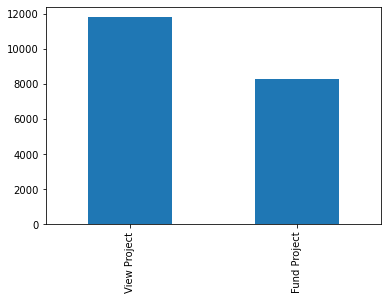

In [46]:
a['event_name'].value_counts().plot.bar()

In [47]:
a['session_id'].nunique()

7118

In [48]:
a[a['event_name']=='Fund Project'].session_id.nunique()

5336

(array([ 57.,  98., 222., 405., 558., 663., 625., 516., 303., 273., 231.,
        215., 206., 169., 134., 124.,  88.,  63.,  64.,  46.,  47.,  35.,
         31.,  32.,  16.,  22.,  18.,  16.,  14.,   7.,   5.,  10.,   8.,
          1.,   3.,   2.,   2.,   1.,   0.,   1.,   2.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,   7.88,  14.76,  21.64,  28.52,  35.4 ,  42.28,  49.16,
         56.04,  62.92,  69.8 ,  76.68,  83.56,  90.44,  97.32, 104.2 ,
        111.08, 117.96, 124.84, 131.72, 138.6 , 145.48, 152.36, 159.24,
        166.12, 173.  , 179.88, 186.76, 193.64, 200.52, 207.4 , 214.28,
        221.16, 228.04, 234.92, 241.8 , 248.68, 255.56, 262.44, 269.32,
        276.2 , 283.08, 289.96, 296.84, 303.72, 310.6 , 317.48, 324.36,
        331.24, 338.12, 345.  ]),
 <a list of 50 Patch objects>)

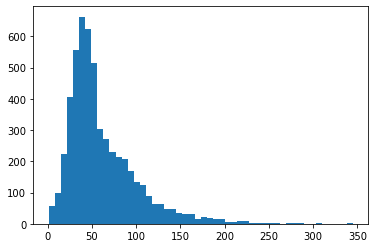

In [58]:
plt.hist(a[a['event_name']=='Fund Project'].groupby('session_id').sum().amount, bins=50)

In [59]:
a[a['event_name']=='Fund Project'].groupby(['session_id','gender']).sum()

,,amount
session_id,gender,
000716c0e76a41508feb786d202748e7,M,37.0
000e13dfa71146e192060542cda8721d,F,29.0
002a9c51650d47f281518d91717c8d31,F,33.0
003368a440394561a4e34a09a738e29f,M,48.0
00365477901b491db0c107b85608ac8a,M,1.0
...,...,...
ffb0c38864ee40beb05f094f44a43e32,M,26.0
ffbc07891604406b952dc99158c25240,F,59.0
ffc1fdad55a94e9bab68c720621f1f9e,F,41.0


In [60]:
b=a[a['event_name']=='Fund Project']

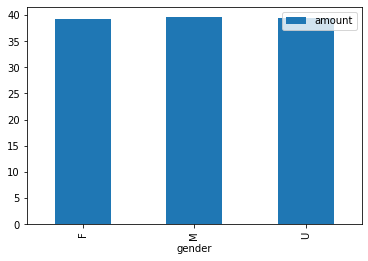

In [61]:
b.groupby('gender').mean().plot.bar()

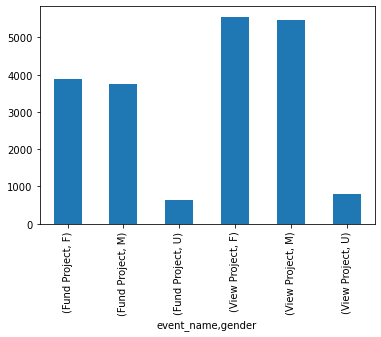

In [62]:
a.groupby(['event_name','gender']).count().category.plot.bar(x='distribution')

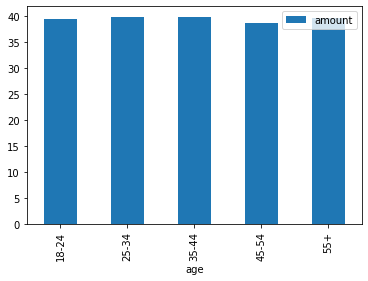

In [63]:
b.groupby('age').mean().plot.bar()

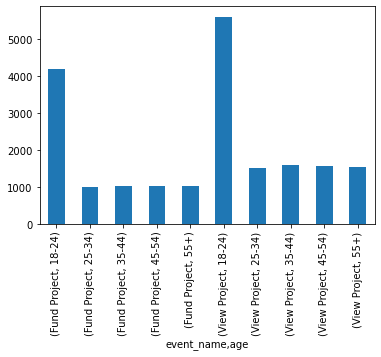

In [64]:
a.groupby(['event_name','age']).count().category.plot.bar()

In [65]:
b.groupby(['state']).sum()

,amount
state,
AK,139.0
AL,3352.0
AR,1424.0
AZ,2496.0
CA,16584.0
CO,36937.0
CT,1688.0
DC,119.0
DE,692.0
